In [1]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image

In [47]:
dir_path = "./test_data/tylenol/"

disaster_dataset = []
for folder, subfolders, filenames in os.walk(dir_path):
    for img in filenames:
        if img.endswith('.jpg'):
            disaster_dataset.append(folder+img)
print(len(disaster_dataset))

5


In [48]:
print(disaster_dataset)

['./data/tylenol/ty02.jpg', './data/tylenol/ty04.jpg', './data/tylenol/ty05.jpg', './data/tylenol/ty03.jpg', './data/tylenol/ty01.jpg']


In [60]:
print(disaster_dataset[0][-8:-4])

ty02


In [41]:
# Declare an augmentation pipeline
transform = A.Compose([
    #A.Resize(height = 820, width = 820),
    A.RandomResizedCrop(p=1, height= 820 ,width= 820, scale=(0.65, 0.95),ratio=(0.90, 1.10)),
    A.RandomBrightnessContrast(always_apply=True, p=1.0, brightness_limit=(-0.4, 0.4), contrast_limit=(-0.4, 0.4), brightness_by_max=False),
    A.SafeRotate(always_apply=True, p=0.5, limit=(-10, 40), interpolation=2, border_mode=0, value=(0, 0, 0), mask_value=None),
    #A.HorizontalFlip(always_apply=False, p=0.5),
    A.CenterCrop(always_apply=True, p=1, height=512, width=512)
    #    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0, p=1.0)
    #A.pytorch.transforms.ToTensorV2()
])

transform_o = A.Compose([
    A.Resize(height = 400, width = 256)
])

In [42]:
med = 'zeromin'
img_path = './test_data/'+med+'.png'

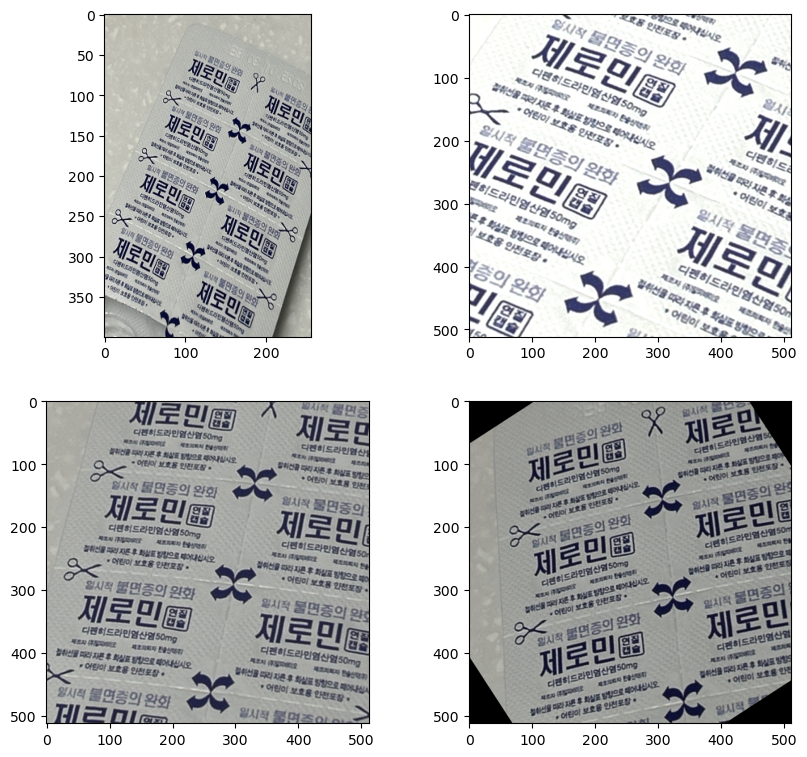

In [43]:
plt.figure(figsize=(10,200))
im_bgr = cv2.imread(img_path)
img = im_bgr[:, :, ::-1]
plt.subplot(40,2,1)
plt.imshow(transform_o(image=img)['image'], cmap=plt.cm.binary)
for i in range(1,4):
    
    
    plt.grid(False)
    plt.subplot(40,2,i+1)
    plt.imshow(transform(image=img)["image"], cmap=plt.cm.binary)

plt.show()

In [44]:
img_path[-11:-4]

'zeromin'

In [45]:
med

'zeromin'

In [46]:
save_path = './Data/'+med+'_augmented/'
dataset = [img_path]

k = 1000
for img in dataset:
    im_bgr = cv2.imread(img)
    img_t = im_bgr[:, :, ::-1]
    for j in range(0,k):
        trans_img = transform(image=img_t)['image']
        img_array = Image.fromarray(trans_img.astype(np.uint8))
        img_array.save(os.path.join(save_path, f"{med}_{j}.jpg"))


In [40]:
dir_path = "../Data/disaster/train/origin_images"

img_names = []
for folder, subfolders, filenames in os.walk(dir_path):
    for img in filenames:
        img_names.append(folder+'/'+img)
print(len(img_names))

1655


In [41]:
disaster_img = pd.DataFrame(img_names, columns=['image_id'])
disaster_img['dir'] = disaster_img['image_id'].apply(lambda x: os.path.dirname(x))
disaster_img['image_id'] = disaster_img['image_id'].apply(lambda x: os.path.basename(x))

disaster_img

,image_id,dir
0,1b24087aa0f9867b.jpg,../Data/disaster/train/origin_images/open_imag...
1,2b3651e8ba31ee65.jpg,../Data/disaster/train/origin_images/open_imag...
2,ecfe8082bc0a55ca.jpg,../Data/disaster/train/origin_images/open_imag...
3,eaa910f252495a1c.jpg,../Data/disaster/train/origin_images/open_imag...
4,17dba0da31436843.jpg,../Data/disaster/train/origin_images/open_imag...
...,...,...
1650,122156386.jpg,../Data/disaster/train/origin_images/flickr30k...
1651,4130537606.jpg,../Data/disaster/train/origin_images/flickr30k...
1652,4922742734.jpg,../Data/disaster/train/origin_images/flickr30k...
1653,3445296377.jpg,../Data/disaster/train/origin_images/flickr30k...


In [8]:
disaster_img.loc[0]['image_id']

'1b24087aa0f9867b.jpg'

In [25]:
real_img = disaster_img.loc[0]['dir'] +'/'+ disaster_img.loc[0]['image_id']
real_img

'../Data/disaster_images/open_image_disaster/1b24087aa0f9867b.jpg'

In [22]:
disaster_img.dir.iloc[0]

'../Data/disaster_images/open_image_disaster'

#### Randomly augmented images save

In [36]:
save_path = '../Data/disaster/augmented/'

k = 4
for i in range(len(disaster_img)):
    image_id = disaster_img.loc[i]['image_id']
    real_img = disaster_img.loc[i]['dir']  +'/'+ image_id
    im_bgr = cv2.imread(real_img)
    img = im_bgr[:, :, ::-1]
    
    ## origin
    trans_img = transform_o(image=img)['image']
    img_array = Image.fromarray(trans_img.astype(np.uint8))
    img_array.save(os.path.join(save_path, f"{image_id[:-4]}_00.jpg"))
    
    for j in range(1,k):
        trans_img = transform(image=img)['image']
        img_array = Image.fromarray(trans_img.astype(np.uint8))
        img_array.save(os.path.join(save_path, f"{image_id[:-4]}_0{j}.jpg"))


#### saparately augmented images save

In [19]:
transform = A.Compose([
    A.Resize(height = 512, width = 512),
    #A.RandomBrightnessContrast(always_apply=True, p=1.0, brightness_limit=(0.00, 0.00), contrast_limit=(0.2, 0.2), brightness_by_max=False),
    #A.SafeRotate(always_apply=True, p=1.0, limit=(-20, 20), interpolation=2, border_mode=0, value=(0, 0, 0), mask_value=None),
    #A.HorizontalFlip(always_apply=True, p=1.0),
    #A.CenterCrop(always_apply=True, p=1.0, height=256, width=256)
    #    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0, p=1.0)
    #A.pytorch.transforms.ToTensorV2()
])

In [49]:
main_path = '../Data/disaster/train/augmented/'
aug = 'CenterCrop'

save_path = main_path + aug
if not os.path.exists(save_path):
    os.makedirs(save_path)


for i in range(len(disaster_img)):
    image_id = disaster_img.loc[i]['image_id']
    real_img = disaster_img.loc[i]['dir']  +'/'+ image_id
    im_bgr = cv2.imread(real_img)
    try:
        img = im_bgr[:, :, ::-1]
    except:
        img = im_bgr
        print(disaster_img.loc[i]['image_id'])

    trans_img = transform(image=img)['image']
    img_array = Image.fromarray(trans_img.astype(np.uint8))
    img_array.save(os.path.join(save_path, f"{image_id[:-4]}_{aug}.jpg"))
    

libpng warning: iCCP: known incorrect sRGB profile


In [20]:
real_img = '1.jpg'
im_bgr = cv2.imread(real_img)
img = im_bgr[:, :, ::-1]
trans_img = transform(image=img)['image']
img_array = Image.fromarray(trans_img.astype(np.uint8))
img_array.save(os.path.join('./', f"{real_img}_01.jpg"))

In [50]:
dir_path =  '../Data/disaster/train/augmented'

augmented = []
for folder, subfolders, filenames in os.walk(dir_path):
    for img in filenames:
        augmented.append(folder+'/'+img)
print(len(augmented))

6620
